In [ ]:
# Start writing code here...

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
%matplotlib inline

In [ ]:
dataset = pd.read_csv('data_20181101_d1_0800_0830.csv')
dataset.set_index(['track_id', 'frame_id'], drop=True, inplace=True)

data_overview = pd.read_csv('data_overview_20181101_d1_0800_0830.csv')
data_overview.set_index(['track_id'], drop=True, inplace=True)

flow = pd.read_csv('flows_per_grid_20181101_d1_0800_0830.csv')
speed = pd.read_csv('speeds_per_grid_20181101_d1_0800_0830.csv')

In [ ]:
display(dataset)
display(data_overview)

lat        lon     speed  lon_acc  lat_acc    time  \
track_id frame_id                                                             
1        960       37.977484  23.737106  3.744083   0.0466  -0.0660   38.40   
         961       37.977484  23.737107  3.744750   0.0383  -0.0711   38.44   
         962       37.977485  23.737109  3.745167   0.0329  -0.0761   38.48   
         963       37.977485  23.737110  3.745444   0.0298  -0.0810   38.52   
         964       37.977486  23.737112  3.745639   0.0247  -0.0860   38.56   
...                      ...        ...       ...      ...      ...     ...   
636      17610     37.978768  23.736271  1.555417   0.1826  -0.1181  704.40   
         17611     37.978768  23.736272  1.562694   0.1810  -0.1207  704.44   
         17612     37.978769  23.736272  1.569944   0.1806  -0.1233  704.48   
         17613     37.978769  23.736273  1.577167   0.1818  -0.1258  704.52   
         17614     37.978769  23.736273  1.584417   0.1805  -0.1279  704.56   

                             E            N  E_heading  N_heading  
track_id frame_id                                                  
1        960       740406.4532  4206851.876   0.692995   0.353623  
         961       740406.5411  4206851.879   0.692995   0.353623  
         962       740406.7135  4206851.995   0.692995   0.353623  
         963       740406.8014  4206851.997   0.692995   0.353623  
         964       740406.9738  4206852.113   0.692995   0.353623  
...                        ...          ...        ...        ...  
636      17610     740328.9085  4206992.220   0.260277   0.118734  
         17611     740328.9964  4206992.223   0.257013   0.229716  
         17612     740328.9931  4206992.334   0.260277   0.118734  
         17613     740329.0810  4206992.336   0.260277   0.118734  
         17614     740329.0810  4206992.336   0.344860   0.232300  

[1048575 rows x 10 columns]

,type,traveled_d,avg_speed,length,width
track_id,,,,,
1,Motorcycle,107.61,17.608581,2.5,1.0
2,Car,20.82,20.820484,5.0,2.0
3,Car,66.16,13.380815,5.0,2.0
4,Motorcycle,9.36,33.685504,2.5,1.0
5,Motorcycle,38.18,31.240518,2.5,1.0
...,...,...,...,...,...
798,Car,73.49,15.562946,5.0,2.0
799,Motorcycle,78.29,23.487983,2.5,1.0
800,Car,66.53,28.512712,5.0,2.0


In [ ]:
dataset['acceration'] = (dataset['speed'] - dataset['speed'].shift(1)) / (dataset['time']-dataset['time'].shift(1))

In [ ]:
display(dataset)

lat        lon     speed  lon_acc  lat_acc    time  \
track_id frame_id                                                             
1        960       37.977484  23.737106  3.744083   0.0466  -0.0660   38.40   
         961       37.977484  23.737107  3.744750   0.0383  -0.0711   38.44   
         962       37.977485  23.737109  3.745167   0.0329  -0.0761   38.48   
         963       37.977485  23.737110  3.745444   0.0298  -0.0810   38.52   
         964       37.977486  23.737112  3.745639   0.0247  -0.0860   38.56   
...                      ...        ...       ...      ...      ...     ...   
636      17610     37.978768  23.736271  1.555417   0.1826  -0.1181  704.40   
         17611     37.978768  23.736272  1.562694   0.1810  -0.1207  704.44   
         17612     37.978769  23.736272  1.569944   0.1806  -0.1233  704.48   
         17613     37.978769  23.736273  1.577167   0.1818  -0.1258  704.52   
         17614     37.978769  23.736273  1.584417   0.1805  -0.1279  704.56   

                             E            N  E_heading  N_heading  acceration  
track_id frame_id                                                              
1        960       740406.4532  4206851.876   0.692995   0.353623         NaN  
         961       740406.5411  4206851.879   0.692995   0.353623    0.016667  
         962       740406.7135  4206851.995   0.692995   0.353623    0.010417  
         963       740406.8014  4206851.997   0.692995   0.353623    0.006944  
         964       740406.9738  4206852.113   0.692995   0.353623    0.004861  
...                        ...          ...        ...        ...         ...  
636      17610     740328.9085  4206992.220   0.260277   0.118734    0.180556  
         17611     740328.9964  4206992.223   0.257013   0.229716    0.181944  
         17612     740328.9931  4206992.334   0.260277   0.118734    0.181250  
         17613     740329.0810  4206992.336   0.260277   0.118734    0.180556  
         17614     740329.0810  4206992.336   0.344860   0.232300    0.181250  

[1048575 rows x 11 columns]

In [ ]:
(lambda: DeepnoteChart(dataset, """{"data":{"name":"placeholder"},"mark":{"type":"point","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"E","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"N","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"quantitative","field":"acc","scale":{"type":"linear","zero":false}}}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(dataset, """{"data":{"name":"placeholder"},"mark":{"type":"point","tooltip":{"content":"data"}},"height":220,"$schema":"https://vega.github.io/schema/vega-lite/v4.json","autosize":{"type":"fit"},"encoding":{"x":{"sort":null,"type":"quantitative","field":"E","scale":{"type":"linear","zero":false}},"y":{"sort":null,"type":"quantitative","field":"N","scale":{"type":"linear","zero":false}},"color":{"sort":null,"type":"quantitative","field":"acc","scale":{"type":"linear","zero":false}}}}"""))()

ValueError: Hierarchical indices not supported

alt.Chart(...)

In [ ]:
# function to plot the location related to the speed
def location(p, time, t=76):
    time = dataset.loc[[p]]['time']
    X = []
    Y = []
    sp = []
    
    for i in range(len(time)):
        if time.iloc[i] == t:   
            x = dataset.loc[[p]]['E']
            y = dataset.loc[[p]]['N']
            X.append(x.iloc[i])
            Y.append(y.iloc[i])
            sp.append(dataset.loc[[p]]['speed'].iloc[i])    
    plt.scatter(X, Y, s = 100, c = sp, cmap='RdYlGn', alpha=0.75)
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.title('Speed of vehicles at time is ' + str(t) + ' s');

In [ ]:
# function to plot the location related to the speed 
def location2(p):
    time = dataset.loc[[p]]['time']
    X = []
    Y = []
    sp = []
    
    for i in range(len(time)):
        x = dataset.loc[[p]]['E']
        y = dataset.loc[[p]]['N']
        X.append(x.iloc[i])
        Y.append(y.iloc[i])
        sp.append(dataset.loc[[p]]['speed'].iloc[i])    
    plt.scatter(X, Y, s = 100, c = sp, cmap='RdYlGn', alpha=0.75)
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.title('Speed of vehicles');

In [ ]:
# Function to plot the speed vs the time
def speed(p):
    time = dataset.loc[[p]]['time']
    speed = dataset.loc[[p]]['speed']
    N = len(time)
    speed_avg = np.ones(N) * data_overview.loc[p]['avg_speed']
    
    
    plt.xlabel('Time [s]')
    plt.ylabel('Speed [m/s]')
    plt.plot(time, speed_avg/3.6, label='Average')
    plt.plot(time, speed, label='Variable')
    plt.legend();

In [ ]:
# Determine which track_id is available at time = 76 sec 
N = round(len(dataset))
p = []
for i in range(0, N):
    time = (dataset.iloc[[i]])['time'].values[0]
    if round(time) == 76:
        track = dataset.iloc[[i]].index.values[0][0]
        p.append(track)

print(p)

KeyboardInterrupt: 

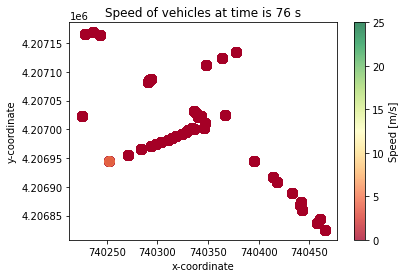

In [ ]:
# Plot the location colored with the speed
for i in range(len(p)):
    location(p[i], 76)
plt.clim(0, 25)
cbar = plt.colorbar()
cbar.set_label('Speed [m/s]');

In [ ]:
print(len([8, 13, 18, 19, 20, 22, 23, 24, 26, 29, 32, 33, 34, 35, 37, 39, 40, 41, 42, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67]))
print(len(p))

41
1016


In [ ]:
# Plot the location colored with the speed
for i in range(len(p)):
    location2(p[i])
plt.clim(0, 25)
cbar = plt.colorbar()
cbar.set_label('Speed [m/s]');

KeyboardInterrupt: 

In [ ]:
p_time = []
p_loc = []
p_speed = []
for i in range(len(dataset)-1):
    if dataset['acc'].iloc[i+1] < 0:
        if dataset['speed'].iloc[i+1] < 2:
            p_time.append(dataset['time'].iloc[[i]].values[0])
            p_loc.append([dataset['E'].iloc[[i]].values[0],dataset['N'].iloc[[i]].values[0]])
            p_speed.append(dataset['speed'].iloc[[i]].values[0])

P_time = np.array(p_time)
P_loc = np.array(p_loc)
P_speed = np.array(p_speed)

new 51256
old 363645


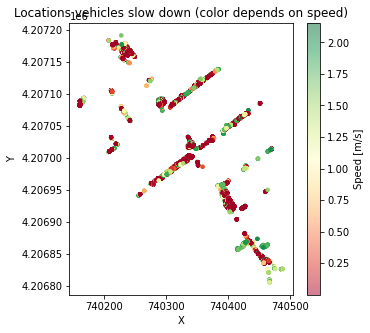

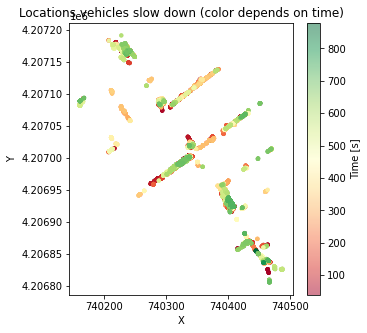

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(P_loc[:,0], P_loc[:,1], s = 10, c = P_speed, cmap='RdYlGn', alpha=0.5)
plt.title('Locations vehicles slow down (color depends on speed)')
plt.xlabel('X')
plt.ylabel('Y')
cbar = plt.colorbar()
cbar.set_label('Speed [m/s]');

plt.figure(figsize=(5,5))
plt.scatter(P_loc[:,0], P_loc[:,1], s = 10, c = P_time, cmap='RdYlGn', alpha=0.5)
plt.title('Locations vehicles slow down (color depends on time)')
plt.xlabel('X')
plt.ylabel('Y')
cbar = plt.colorbar()
cbar.set_label('Time [s]');

print('new', len(P_speed))
print('old', 363645)


In [ ]:
# function to plot the location related to the speed 
def location3(p):
    time = dataset.loc[[p]]['time']
    X = dataset.loc[[p]]['E']
    Y = dataset.loc[[p]]['N']
    sp =  dataset.loc[[p]]['speed'] 

    plt.scatter(X, Y, s = 100, c = sp, cmap='RdYlGn', alpha=0.05)
    plt.xlabel('x-coordinate')
    plt.ylabel('y-coordinate')
    plt.title('Speed of vehicles');
    

In [ ]:
p_loc

[[740406.9738, 4206852.113],
 [740407.1462, 4206852.23],
 [740407.2341, 4206852.232],
 [740407.4065, 4206852.348],
 [740407.4943, 4206852.351],
 [740407.6668, 4206852.467],
 [740407.7514, 4206852.581],
 [740407.9271, 4206852.586],
 [740408.0116, 4206852.699],
 [740408.1841, 4206852.815],
 [740408.2719, 4206852.818],
 [740408.4444, 4206852.934],
 [740408.5289, 4206853.048],
 [740408.7046, 4206853.053],
 [740408.7892, 4206853.167],
 [740408.9649, 4206853.172],
 [740409.0495, 4206853.285],
 [740409.2219, 4206853.401],
 [740409.3098, 4206853.404],
 [740409.4822, 4206853.52],
 [740409.5668, 4206853.634],
 [740409.7425, 4206853.639],
 [740409.8271, 4206853.752],
 [740409.9117, 4206853.866],
 [740410.0874, 4206853.871],
 [740410.1719, 4206853.985],
 [740410.3444, 4206854.101],
 [740410.4322, 4206854.104],
 [740410.6047, 4206854.22],
 [740410.6892, 4206854.333],
 [740410.8649, 4206854.338],
 [740410.9495, 4206854.452],
 [740411.0341, 4206854.566],
 [740411.2098, 4206854.571],
 [740411.2944, 42

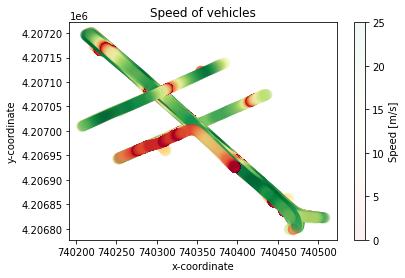

In [ ]:
SD = np.array([8, 13, 18, 19, 20, 22, 23, 24, 26, 29, 32, 33, 34, 35, 37, 39, 40, 41, 42, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67])
for i in range(len(SD)):
    location3(SD[i])
plt.clim(0, 25)
cbar = plt.colorbar()
cbar.set_label('Speed [m/s]');

In [ ]:
display(flow)

,E_id,N_id,0,1,2,3,4,5,6,7,...,49,50,51,52,53,54,55,56,57,58
0,17,4,4.0,NaN,NaN,NaN,NaN,1.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17,5,4.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18,5,4.0,1.0,NaN,NaN,NaN,NaN,4.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19,5,6.0,3.0,3.0,NaN,2.0,7.0,9.0,5.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,5,5.0,4.0,9.0,3.0,1.0,18.0,19.0,7.0,...,9.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,4,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,4,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,18,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,2,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
display(speed)

<function __main__.speed(p)>

In [ ]:
plt.scatter(speed['E_id'], speed['N_id']) #, c = speed['5'])
plt.title('Grid')
plt.xlabel('East')
plt.ylabel('North')
cbar = plt.colorbar();
# cbar.set_label('Speed [m/s]');

TypeError: 'function' object is not subscriptable

In [ ]:
### K-means ###
feature1 = speed
feature2 = flow
# feature3 = acceleration
# feature4 = direction
time1 = speed['0']
#time1['feature2'] = flow['0']
display(time1)


TypeError: 'function' object is not subscriptable

In [ ]:
feature1 = []
feature2 = []
for i in range(len(speed)):
    feature1.append(speed.iloc[i,2])
    feature2.append(flow.iloc[i,2])

data = {'Feature1_speed': feature1,
        'Feature2_flow':feature2}

df = pd.DataFrame(data)
display(df)

TypeError: object of type 'function' has no len()

In [ ]:
from math import isnan
#print(speed.iloc[:,2].isnan())
print(speed.iloc[16,2], np.nan)
qa = speed.iloc[:,2]
print(qa.isnull())
qan = qa.isnull()
print(qan.iloc[8])
for i in range(len(qa)):
    if qan.iloc[i] == False:
        print(qa.iloc[i])

AttributeError: 'function' object has no attribute 'iloc'

In [ ]:
print(speed.iloc[:, 2])
Eloc = []
Nloc = []
feature1 = []
feature2 = []


for i in range(len(speed)):
    if speed.iloc[:,2].isnull().iloc[i] == False & flow.iloc[:,2].isnull().iloc[i] == False:
            Eloc.append(speed.iloc[i,0])
            Nloc.append(speed.iloc[i,1])
            feature1.append(speed.iloc[i,2])
            feature2.append(flow.iloc[i,2])

data_noNAN = {'Eloc': Eloc,
        'Nloc': Nloc,
        'Feature1_speed': feature1,
        'Feature2_flow':feature2}

dfnoNAN = pd.DataFrame(data_noNAN)
display(dfnoNAN)

0      3.500943
1      3.426219
2      2.692282
3      4.183284
4      6.313072
         ...   
167         NaN
168         NaN
169         NaN
170         NaN
171         NaN
Name: 0, Length: 172, dtype: float64


,Eloc,Nloc,Feature1_speed,Feature2_flow
0,17,4,3.500943,4.0
1,17,5,3.426219,4.0
2,18,5,2.692282,4.0
3,19,5,4.183284,6.0
4,20,5,6.313072,5.0
...,...,...,...,...
63,10,13,10.024169,3.0
64,11,13,8.726019,3.0
65,11,14,7.426164,2.0
66,12,14,5.136158,2.0


In [ ]:
display(dfnoNAN.iloc[:,2:])

,Feature1_speed,Feature2_flow
0,3.500943,4.0
1,3.426219,4.0
2,2.692282,4.0
3,4.183284,6.0
4,6.313072,5.0
...,...,...
63,10.024169,3.0
64,8.726019,3.0
65,7.426164,2.0
66,5.136158,2.0


In [ ]:
x = []
y = []
for i in range(1, len(dfnoNAN)):
        # Perform K-means clustering
        kmeans = KMeans(n_clusters=i).fit(dfnoNAN.iloc[:,2:])
        x.append(i)
        y.append(kmeans.inertia_) 

X = np.array(x)
Y = np.array(y)
der = []
for i in range(0, len(X)-1):
    der.append(abs((Y[i+1]-Y[i])/(X[i+1]-X[i])))

# find the 'sudden stop'
for i in range(0, len(der)-1):
    if der[i] - der[i+1] < 0.2:
        print('Sudden stop when the difference between cost is', round(Y[i] - Y[i+1],4))
        print('Amount of clusters', X[i]+1)
        
        kmeans = KMeans(n_clusters=i).fit(dfnoNAN.iloc[:,2:])
        print('The cost will be ', round(kmeans.inertia_,4) ) 
        I = i + 1
        break

Sudden stop when the difference between cost is 15.5394
Amount of clusters 9
The cost will be  155.6172


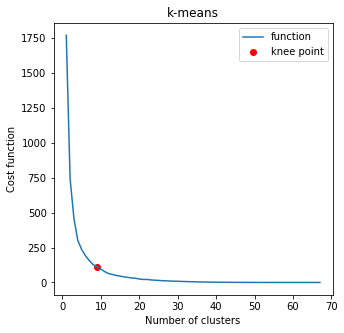

In [ ]:
plt.figure(figsize=(5, 5))
plt.title('k-means')
plt.xlabel('Number of clusters')
plt.ylabel('Cost function')  
plt.plot(x,y, label='function')
plt.scatter(X[I],Y[I], color='r', label='knee point')
plt.legend()
plt.show()

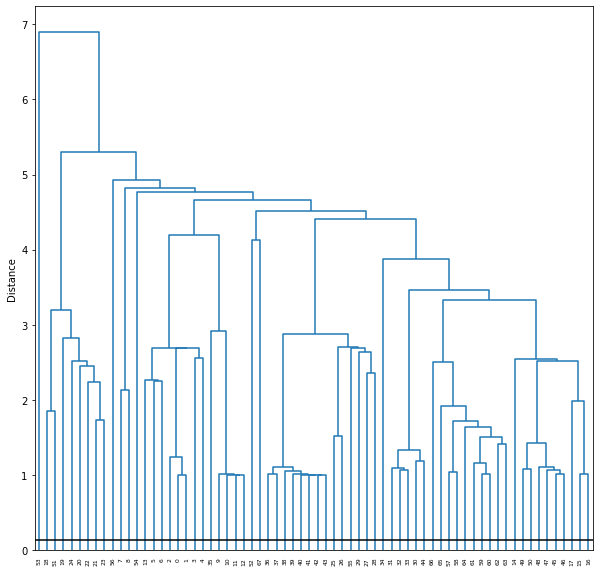

In [ ]:
# Plot dendrogram when the threshold is 4.5

# Perform hierarchical clustering
Z = hierarchy.linkage(dfnoNAN, 'single')

# Plot the hierarchical clustering as a dendrogram.
plt.figure(figsize=(10, 10))
dn = hierarchy.dendrogram(Z, color_threshold=0.13)
plt.ylabel('Distance')
plt.axhline(4.5, color='k');  # threshold line

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=dc8bb720-d815-4ecd-8bea-56e83d6bf798' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>